In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.tsa.stattools import adfuller


In [55]:
features_1 = pd.read_csv('../data/processed/m_features.csv')
features_2 = pd.read_csv('../data/processed/m_potato_features.csv')

In [56]:
features_1.head()

,date,CPI,Exchange Rate,GDP Deflator,GDP Growth,Cereal Yield,Fertilizer Consumption,Rural Population,Employment in Agriculture,Access to Electricity,Inflation Rate,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,shortwave_radiation_sum,et0_fao_evapotranspiration,holidays
0,2013-06-01,134.911559,94.947081,119.234817,4.561124,2696.775,59.830635,82.032083,65.766698,80.525,8.758493,24.273333,19.173333,21.316667,550.0,6.596667,420.21,84.03,1
1,2013-07-01,135.820242,95.319618,120.007364,4.768318,2700.350,60.907737,82.001500,65.717010,81.150,8.702159,23.783871,19.487097,21.135484,620.7,6.287097,375.16,74.59,1
2,2013-08-01,136.728925,95.692155,120.779912,4.975512,2703.925,61.984838,81.970917,65.667323,81.775,8.645825,23.929032,18.893548,20.906452,415.8,6.041935,431.83,84.34,3
3,2013-09-01,137.637608,96.064693,121.552459,5.182706,2707.500,63.061940,81.940333,65.617635,82.400,8.589491,24.000000,18.020000,20.580000,217.9,6.186667,480.53,91.87,5
4,2013-10-01,138.546290,96.437230,122.325006,5.389900,2711.075,64.139041,81.909750,65.567948,83.025,8.533157,21.064516,15.274194,17.848387,238.2,5.403226,398.57,73.18,6


In [57]:
features_2.head()

,date,Export Quantity,Import Quantity,Area harvested,Production,Yield
0,2013-06-01,1298.225,179180.425,200771.916667,2.743376e+06,13663.591667
1,2013-07-01,1474.070,180215.310,201479.500000,2.753966e+06,13668.150000
2,2013-08-01,1649.915,181250.195,202187.083333,2.764557e+06,13672.708333
3,2013-09-01,1825.760,182285.080,202894.666667,2.775148e+06,13677.266667
4,2013-10-01,2001.605,183319.965,203602.250000,2.785739e+06,13681.825000


In [58]:
features_1['date'] = pd.to_datetime(features_1['date'])
features_1.set_index('date', inplace=True)

features_2['date'] = pd.to_datetime(features_2['date'])
features_2.set_index('date', inplace=True)


features = features_1.join(features_2, how='inner')
features.drop(columns=['holidays'], inplace=True) # holidays column doesn't need to be predicted
features.head()

,CPI,Exchange Rate,GDP Deflator,GDP Growth,Cereal Yield,Fertilizer Consumption,Rural Population,Employment in Agriculture,Access to Electricity,Inflation Rate,...,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,shortwave_radiation_sum,et0_fao_evapotranspiration,Export Quantity,Import Quantity,Area harvested,Production,Yield
date,,,,,,,,,,,,,,,,,,,,,
2013-06-01,134.911559,94.947081,119.234817,4.561124,2696.775,59.830635,82.032083,65.766698,80.525,8.758493,...,21.316667,550.0,6.596667,420.21,84.03,1298.225,179180.425,200771.916667,2.743376e+06,13663.591667
2013-07-01,135.820242,95.319618,120.007364,4.768318,2700.350,60.907737,82.001500,65.717010,81.150,8.702159,...,21.135484,620.7,6.287097,375.16,74.59,1474.070,180215.310,201479.500000,2.753966e+06,13668.150000
2013-08-01,136.728925,95.692155,120.779912,4.975512,2703.925,61.984838,81.970917,65.667323,81.775,8.645825,...,20.906452,415.8,6.041935,431.83,84.34,1649.915,181250.195,202187.083333,2.764557e+06,13672.708333
2013-09-01,137.637608,96.064693,121.552459,5.182706,2707.500,63.061940,81.940333,65.617635,82.400,8.589491,...,20.580000,217.9,6.186667,480.53,91.87,1825.760,182285.080,202894.666667,2.775148e+06,13677.266667
2013-10-01,138.546290,96.437230,122.325006,5.389900,2711.075,64.139041,81.909750,65.567948,83.025,8.533157,...,17.848387,238.2,5.403226,398.57,73.18,2001.605,183319.965,203602.250000,2.785739e+06,13681.825000


In [59]:
features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2013-06-01 to 2021-05-01
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CPI                         96 non-null     float64
 1   Exchange Rate               96 non-null     float64
 2   GDP Deflator                96 non-null     float64
 3   GDP Growth                  96 non-null     float64
 4   Cereal Yield                96 non-null     float64
 5   Fertilizer Consumption      96 non-null     float64
 6   Rural Population            96 non-null     float64
 7   Employment in Agriculture   96 non-null     float64
 8   Access to Electricity       96 non-null     float64
 9   Inflation Rate              96 non-null     float64
 10  temperature_2m_max          96 non-null     float64
 11  temperature_2m_min          96 non-null     float64
 12  temperature_2m_mean         96 non-null     float64
 13  precipitation_sum

In [60]:
def check_stationarity(series):
    """
    Check stationarity of a series and apply differencing until it becomes stationary.
    """
    # Ensure no infinite recursion
    max_diff = 5  # Set a limit to the number of differencing steps
    diff_count = 0
    
    while diff_count < max_diff:
        result = adfuller(series.dropna())  # Drop NaNs for ADF test
        if result[1] <= 0.05:
            print(f"The series is stationary after {diff_count} differencing step(s).")
            print('\n')
            return series, diff_count
        else:
            print(f"The series is non-stationary. Applying differencing (step {diff_count + 1})...")
            series = series.diff()
            diff_count += 1
    
    raise ValueError("The series could not be made stationary within the differencing limit.")

# Initialize a dictionary to store the differencing degrees
differencing_degrees = {}

# Apply the function to each column of the DataFrame
for col in features.columns:
    print(f"Checking for stationarity for {col}...")
    stationary_series, diff_count = check_stationarity(features[col])

    differencing_degrees[col] = diff_count  # Store the differencing degree
    features[f'{col}_diff'] = stationary_series  # Store the stationary series
    
    features = features.drop(columns=[col])

Checking for stationarity for CPI...
The series is non-stationary. Applying differencing (step 1)...
The series is non-stationary. Applying differencing (step 2)...
The series is stationary after 2 differencing step(s).


Checking for stationarity for Exchange Rate...
The series is non-stationary. Applying differencing (step 1)...
The series is non-stationary. Applying differencing (step 2)...
The series is stationary after 2 differencing step(s).


Checking for stationarity for GDP Deflator...
The series is non-stationary. Applying differencing (step 1)...
The series is non-stationary. Applying differencing (step 2)...
The series is stationary after 2 differencing step(s).


Checking for stationarity for GDP Growth...
The series is stationary after 0 differencing step(s).


Checking for stationarity for Cereal Yield...
The series is non-stationary. Applying differencing (step 1)...
The series is non-stationary. Applying differencing (step 2)...
The series is stationary after 2 differe

In [61]:
features = features[3:]
features

,CPI_diff,Exchange Rate_diff,GDP Deflator_diff,GDP Growth_diff,Cereal Yield_diff,Fertilizer Consumption_diff,Rural Population_diff,Employment in Agriculture_diff,Access to Electricity_diff,Inflation Rate_diff,...,temperature_2m_mean_diff,precipitation_sum_diff,wind_speed_10m_max_diff,shortwave_radiation_sum_diff,et0_fao_evapotranspiration_diff,Export Quantity_diff,Import Quantity_diff,Area harvested_diff,Production_diff,Yield_diff
date,,,,,,,,,,,,,,,,,,,,,
2013-09-01,0.000000e+00,4.263256e-14,1.421085e-14,5.182706,0.000000e+00,0.000000e+00,-2.842171e-14,0.000000e+00,82.400000,0.000000e+00,...,-0.326452,-197.9,0.144731,48.70,91.87,1825.760000,-2.910383e-11,202894.666667,0.000000e+00,1.818989e-12
2013-10-01,-5.684342e-14,-4.263256e-14,0.000000e+00,5.389900,4.547474e-13,0.000000e+00,2.842171e-14,0.000000e+00,83.025000,0.000000e+00,...,-2.731613,20.3,-0.783441,-81.96,73.18,2001.605000,2.910383e-11,203602.250000,4.656613e-10,0.000000e+00
2013-11-01,5.684342e-14,0.000000e+00,1.421085e-14,5.597095,-4.547474e-13,-7.105427e-15,-2.842171e-14,0.000000e+00,83.650000,0.000000e+00,...,-3.738387,-233.9,0.883441,36.71,72.67,2177.450000,0.000000e+00,204309.833333,-4.656613e-10,-3.637979e-12
2013-12-01,0.000000e+00,4.263256e-14,-1.421085e-14,5.804289,4.547474e-13,1.421085e-14,2.842171e-14,0.000000e+00,84.275000,0.000000e+00,...,-2.993871,0.8,0.132688,-38.83,61.33,2353.295000,-2.910383e-11,205017.416667,0.000000e+00,3.637979e-12
2014-01-01,-2.842171e-14,-2.842171e-14,-1.421085e-14,6.011483,-4.547474e-13,-1.421085e-14,-2.842171e-14,0.000000e+00,84.900000,0.000000e+00,...,-0.432258,11.1,0.312903,36.54,67.15,2529.140000,2.910383e-11,205725.000000,4.656613e-10,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01,-2.842171e-14,2.842171e-14,0.000000e+00,4.838150,0.000000e+00,-1.421085e-14,0.000000e+00,-2.131628e-14,89.900000,-8.881784e-16,...,0.096774,-2.3,1.212903,33.94,74.54,0.850000,-5.820766e-11,198788.000000,0.000000e+00,-3.637979e-12
2021-02-01,6.309124e-01,6.063735e-01,2.888067e-01,4.904247,2.461667e+01,3.449102e-01,-9.166667e-04,-2.332498e-02,90.016667,3.669832e-01,...,1.190553,22.4,0.142742,26.56,81.69,3.093333,-7.069676e+03,198743.416667,-8.983583e+03,3.328333e+01
2021-03-01,5.684342e-14,1.421085e-14,-2.842171e-14,4.970344,0.000000e+00,0.000000e+00,9.166667e-04,7.105427e-15,90.133333,8.881784e-16,...,4.238479,13.9,0.412097,144.44,119.26,5.336667,5.820766e-11,198698.833333,0.000000e+00,-3.637979e-12


In [62]:
adf_result = adfuller(features.iloc[:, 0])

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -9.50607618965997
p-value: 3.344641223990361e-16


In [63]:
# split train test data. 12 months for test data
train_data = features[:-12]
test_data = features[-12:]

In [64]:
train_data = train_data.asfreq('MS')

In [73]:
adf_result = adfuller(train_data.iloc[:, 7])

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -8.85823728109603
p-value: 1.507368284318975e-14


In [77]:
from typing import Union
from tqdm.notebook import tqdm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:
    """
    Optimize ARIMA parameters for a given time series.
    """
    results = []
    
    for order in tqdm(order_list):

        print(f"Order[0]: {order[0]}, d: {d} , Order[1]: {order[1]}")
        try: 
            model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False, trend='ct').fit(disp=False)
        except Exception as e:
            print(f"Error with order {order}: {e}")
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']
    
    # Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

def optimize_ARIMA_for_df(df: pd.DataFrame, order_list: list, differencing_degrees: dict) -> dict:
    """
    Optimize ARIMA for each column in the DataFrame using the specified differencing degree for each column.
    """
    results_dict = {}

    for column in tqdm(df.columns, desc="Optimizing ARIMA for each column"):
        print('Column:', column)    
        d = differencing_degrees.get(column, 0)  # Get differencing degree for the column, default to 0 if not found
        if d is None:
            print(f"Skipping column {column} due to missing differencing degree.")
            results_dict[column] = None
            continue
        
        try:
            endog = df[column].dropna()  # Ensure no NaN values in the column
            result_df = optimize_ARIMA(endog, order_list, d)
            results_dict[column] = result_df
        except Exception as e:
            print(f"Error processing column {column}: {e}")
            results_dict[column] = None  # Store None if the column cannot be processed

    return results_dict


# Example Usage:

# Assuming `train_data` is your DataFrame and `differencing_degrees` is your dictionary of differencing degrees.
# Define the list of ARIMA orders to try.
order_list = [(p, q) for p in range(3) for q in range(3)]  # Example: (0, 0) to (2, 2)

# Apply the function
df_results = optimize_ARIMA_for_df(train_data, order_list, differencing_degrees)

Optimizing ARIMA for each column:   0%|          | 0/22 [00:00<?, ?it/s]

Column: CPI_diff


  0%|          | 0/9 [00:00<?, ?it/s]

Order[0]: 0, d: 0 , Order[1]: 0
Order[0]: 0, d: 0 , Order[1]: 1


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 0, d: 0 , Order[1]: 2
Order[0]: 1, d: 0 , Order[1]: 0
Order[0]: 1, d: 0 , Order[1]: 1
Order[0]: 1, d: 0 , Order[1]: 2
Order[0]: 2, d: 0 , Order[1]: 0
Order[0]: 2, d: 0 , Order[1]: 1
Order[0]: 2, d: 0 , Order[1]: 2
Column: Exchange Rate_diff


  0%|          | 0/9 [00:00<?, ?it/s]

Order[0]: 0, d: 0 , Order[1]: 0
Order[0]: 0, d: 0 , Order[1]: 1


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 0, d: 0 , Order[1]: 2
Order[0]: 1, d: 0 , Order[1]: 0
Order[0]: 1, d: 0 , Order[1]: 1
Order[0]: 1, d: 0 , Order[1]: 2
Order[0]: 2, d: 0 , Order[1]: 0
Order[0]: 2, d: 0 , Order[1]: 1
Order[0]: 2, d: 0 , Order[1]: 2


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Column: GDP Deflator_diff


  0%|          | 0/9 [00:00<?, ?it/s]

Order[0]: 0, d: 0 , Order[1]: 0
Order[0]: 0, d: 0 , Order[1]: 1
Order[0]: 0, d: 0 , Order[1]: 2
Order[0]: 1, d: 0 , Order[1]: 0
Order[0]: 1, d: 0 , Order[1]: 1
Order[0]: 1, d: 0 , Order[1]: 2
Order[0]: 2, d: 0 , Order[1]: 0
Order[0]: 2, d: 0 , Order[1]: 1
Order[0]: 2, d: 0 , Order[1]: 2
Column: GDP Growth_diff


  0%|          | 0/9 [00:00<?, ?it/s]

Order[0]: 0, d: 0 , Order[1]: 0
Order[0]: 0, d: 0 , Order[1]: 1
Order[0]: 0, d: 0 , Order[1]: 2


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Order[0]: 1, d: 0 , Order[1]: 0
Order[0]: 1, d: 0 , Order[1]: 1
Order[0]: 1, d: 0 , Order[1]: 2


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 0 , Order[1]: 0
Order[0]: 2, d: 0 , Order[1]: 1


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 0 , Order[1]: 2
Column: Cereal Yield_diff


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  0%|          | 0/9 [00:00<?, ?it/s]

Order[0]: 0, d: 0 , Order[1]: 0
Order[0]: 0, d: 0 , Order[1]: 1
Order[0]: 0, d: 0 , Order[1]: 2
Order[0]: 1, d: 0 , Order[1]: 0
Order[0]: 1, d: 0 , Order[1]: 1


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 1, d: 0 , Order[1]: 2


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 0 , Order[1]: 0
Order[0]: 2, d: 0 , Order[1]: 1


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 0 , Order[1]: 2


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Column: Fertilizer Consumption_diff


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  0%|          | 0/9 [00:00<?, ?it/s]

Order[0]: 0, d: 0 , Order[1]: 0
Order[0]: 0, d: 0 , Order[1]: 1
Order[0]: 0, d: 0 , Order[1]: 2
Order[0]: 1, d: 0 , Order[1]: 0
Order[0]: 1, d: 0 , Order[1]: 1
Order[0]: 1, d: 0 , Order[1]: 2
Order[0]: 2, d: 0 , Order[1]: 0
Order[0]: 2, d: 0 , Order[1]: 1
Order[0]: 2, d: 0 , Order[1]: 2
Column: Rural Population_diff


  0%|          | 0/9 [00:00<?, ?it/s]

Order[0]: 0, d: 0 , Order[1]: 0
Order[0]: 0, d: 0 , Order[1]: 1


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 0, d: 0 , Order[1]: 2


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 1, d: 0 , Order[1]: 0
Order[0]: 1, d: 0 , Order[1]: 1


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 1, d: 0 , Order[1]: 2
Order[0]: 2, d: 0 , Order[1]: 0
Order[0]: 2, d: 0 , Order[1]: 1
Order[0]: 2, d: 0 , Order[1]: 2
Column: Employment in Agriculture_diff


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  0%|          | 0/9 [00:00<?, ?it/s]

c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 0, d: 0 , Order[1]: 0
Order[0]: 0, d: 0 , Order[1]: 1


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 0, d: 0 , Order[1]: 2
Order[0]: 1, d: 0 , Order[1]: 0
Order[0]: 1, d: 0 , Order[1]: 1
Order[0]: 1, d: 0 , Order[1]: 2
Order[0]: 2, d: 0 , Order[1]: 0
Order[0]: 2, d: 0 , Order[1]: 1
Order[0]: 2, d: 0 , Order[1]: 2


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Column: Access to Electricity_diff


  0%|          | 0/9 [00:00<?, ?it/s]

Order[0]: 0, d: 0 , Order[1]: 0
Order[0]: 0, d: 0 , Order[1]: 1


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 0, d: 0 , Order[1]: 2


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Order[0]: 1, d: 0 , Order[1]: 0
Order[0]: 1, d: 0 , Order[1]: 1
Order[0]: 1, d: 0 , Order[1]: 2


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 0 , Order[1]: 0
Order[0]: 2, d: 0 , Order[1]: 1
Order[0]: 2, d: 0 , Order[1]: 2
Column: Inflation Rate_diff


  0%|          | 0/9 [00:00<?, ?it/s]

Order[0]: 0, d: 0 , Order[1]: 0
Order[0]: 0, d: 0 , Order[1]: 1
Order[0]: 0, d: 0 , Order[1]: 2


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 1, d: 0 , Order[1]: 0
Order[0]: 1, d: 0 , Order[1]: 1
Order[0]: 1, d: 0 , Order[1]: 2
Order[0]: 2, d: 0 , Order[1]: 0
Order[0]: 2, d: 0 , Order[1]: 1


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 0 , Order[1]: 2
Column: temperature_2m_max_diff


  0%|          | 0/9 [00:00<?, ?it/s]

Order[0]: 0, d: 0 , Order[1]: 0
Order[0]: 0, d: 0 , Order[1]: 1
Order[0]: 0, d: 0 , Order[1]: 2
Order[0]: 1, d: 0 , Order[1]: 0
Order[0]: 1, d: 0 , Order[1]: 1
Order[0]: 1, d: 0 , Order[1]: 2
Order[0]: 2, d: 0 , Order[1]: 0
Order[0]: 2, d: 0 , Order[1]: 1


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 0 , Order[1]: 2
Column: temperature_2m_min_diff


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  0%|          | 0/9 [00:00<?, ?it/s]

Order[0]: 0, d: 0 , Order[1]: 0
Order[0]: 0, d: 0 , Order[1]: 1
Order[0]: 0, d: 0 , Order[1]: 2
Order[0]: 1, d: 0 , Order[1]: 0
Order[0]: 1, d: 0 , Order[1]: 1
Order[0]: 1, d: 0 , Order[1]: 2
Order[0]: 2, d: 0 , Order[1]: 0
Order[0]: 2, d: 0 , Order[1]: 1
Order[0]: 2, d: 0 , Order[1]: 2
Column: temperature_2m_mean_diff


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  0%|          | 0/9 [00:00<?, ?it/s]

Order[0]: 0, d: 0 , Order[1]: 0
Order[0]: 0, d: 0 , Order[1]: 1
Order[0]: 0, d: 0 , Order[1]: 2
Order[0]: 1, d: 0 , Order[1]: 0
Order[0]: 1, d: 0 , Order[1]: 1
Order[0]: 1, d: 0 , Order[1]: 2
Order[0]: 2, d: 0 , Order[1]: 0
Order[0]: 2, d: 0 , Order[1]: 1
Order[0]: 2, d: 0 , Order[1]: 2


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Column: precipitation_sum_diff


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  0%|          | 0/9 [00:00<?, ?it/s]

Order[0]: 0, d: 0 , Order[1]: 0
Order[0]: 0, d: 0 , Order[1]: 1
Order[0]: 0, d: 0 , Order[1]: 2
Order[0]: 1, d: 0 , Order[1]: 0
Order[0]: 1, d: 0 , Order[1]: 1
Order[0]: 1, d: 0 , Order[1]: 2
Order[0]: 2, d: 0 , Order[1]: 0
Order[0]: 2, d: 0 , Order[1]: 1
Order[0]: 2, d: 0 , Order[1]: 2


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Column: wind_speed_10m_max_diff


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  0%|          | 0/9 [00:00<?, ?it/s]

Order[0]: 0, d: 0 , Order[1]: 0
Order[0]: 0, d: 0 , Order[1]: 1
Order[0]: 0, d: 0 , Order[1]: 2
Order[0]: 1, d: 0 , Order[1]: 0
Order[0]: 1, d: 0 , Order[1]: 1
Order[0]: 1, d: 0 , Order[1]: 2
Order[0]: 2, d: 0 , Order[1]: 0
Order[0]: 2, d: 0 , Order[1]: 1
Order[0]: 2, d: 0 , Order[1]: 2


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting au

Column: shortwave_radiation_sum_diff


  0%|          | 0/9 [00:00<?, ?it/s]

Order[0]: 0, d: 0 , Order[1]: 0
Order[0]: 0, d: 0 , Order[1]: 1
Order[0]: 0, d: 0 , Order[1]: 2
Order[0]: 1, d: 0 , Order[1]: 0
Order[0]: 1, d: 0 , Order[1]: 1
Order[0]: 1, d: 0 , Order[1]: 2


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertib

Order[0]: 2, d: 0 , Order[1]: 0
Order[0]: 2, d: 0 , Order[1]: 1
Order[0]: 2, d: 0 , Order[1]: 2
Column: et0_fao_evapotranspiration_diff


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  0%|          | 0/9 [00:00<?, ?it/s]

Order[0]: 0, d: 0 , Order[1]: 0
Order[0]: 0, d: 0 , Order[1]: 1
Order[0]: 0, d: 0 , Order[1]: 2
Order[0]: 1, d: 0 , Order[1]: 0
Order[0]: 1, d: 0 , Order[1]: 1
Order[0]: 1, d: 0 , Order[1]: 2
Order[0]: 2, d: 0 , Order[1]: 0
Order[0]: 2, d: 0 , Order[1]: 1


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 0 , Order[1]: 2
Column: Export Quantity_diff


  0%|          | 0/9 [00:00<?, ?it/s]

Order[0]: 0, d: 0 , Order[1]: 0
Order[0]: 0, d: 0 , Order[1]: 1
Order[0]: 0, d: 0 , Order[1]: 2
Order[0]: 1, d: 0 , Order[1]: 0
Order[0]: 1, d: 0 , Order[1]: 1


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 1, d: 0 , Order[1]: 2
Order[0]: 2, d: 0 , Order[1]: 0
Order[0]: 2, d: 0 , Order[1]: 1
Order[0]: 2, d: 0 , Order[1]: 2
Column: Import Quantity_diff


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  0%|          | 0/9 [00:00<?, ?it/s]

Order[0]: 0, d: 0 , Order[1]: 0
Order[0]: 0, d: 0 , Order[1]: 1
Order[0]: 0, d: 0 , Order[1]: 2
Order[0]: 1, d: 0 , Order[1]: 0
Order[0]: 1, d: 0 , Order[1]: 1
Order[0]: 1, d: 0 , Order[1]: 2


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertib

Order[0]: 2, d: 0 , Order[1]: 0
Order[0]: 2, d: 0 , Order[1]: 1


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 0 , Order[1]: 2
Column: Area harvested_diff


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


  0%|          | 0/9 [00:00<?, ?it/s]

Order[0]: 0, d: 0 , Order[1]: 0
Order[0]: 0, d: 0 , Order[1]: 1
Order[0]: 0, d: 0 , Order[1]: 2
Order[0]: 1, d: 0 , Order[1]: 0
Order[0]: 1, d: 0 , Order[1]: 1


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 1, d: 0 , Order[1]: 2
Order[0]: 2, d: 0 , Order[1]: 0
Order[0]: 2, d: 0 , Order[1]: 1
Order[0]: 2, d: 0 , Order[1]: 2
Column: Production_diff


  0%|          | 0/9 [00:00<?, ?it/s]

Order[0]: 0, d: 0 , Order[1]: 0
Order[0]: 0, d: 0 , Order[1]: 1
Order[0]: 0, d: 0 , Order[1]: 2
Order[0]: 1, d: 0 , Order[1]: 0
Order[0]: 1, d: 0 , Order[1]: 1


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 1, d: 0 , Order[1]: 2


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 0 , Order[1]: 0
Order[0]: 2, d: 0 , Order[1]: 1


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 0 , Order[1]: 2


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Column: Yield_diff


  0%|          | 0/9 [00:00<?, ?it/s]

Order[0]: 0, d: 0 , Order[1]: 0
Order[0]: 0, d: 0 , Order[1]: 1
Order[0]: 0, d: 0 , Order[1]: 2
Order[0]: 1, d: 0 , Order[1]: 0
Order[0]: 1, d: 0 , Order[1]: 1


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 1, d: 0 , Order[1]: 2
Order[0]: 2, d: 0 , Order[1]: 0
Order[0]: 2, d: 0 , Order[1]: 1
Order[0]: 2, d: 0 , Order[1]: 2


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting au

In [ ]:
df_results

{'CPI_diff':     (p,q)         AIC
 0  (0, 0) -184.140901
 1  (0, 1) -182.140900
 2  (1, 0) -182.140900
 3  (1, 1) -181.726919
 4  (0, 2) -180.140900
 5  (2, 0) -180.140900
 6  (2, 1) -178.140952
 7  (1, 2) -178.140900
 8  (2, 2) -176.140900,
 'Exchange Rate_diff':     (p,q)         AIC
 0  (0, 0) -120.567273
 1  (0, 1) -118.567273
 2  (1, 0) -118.567273
 3  (0, 2) -116.567273
 4  (1, 1) -116.567273
 5  (2, 0) -116.567273
 6  (1, 2) -114.567273
 7  (2, 1) -114.567273
 8  (2, 2) -112.567273,
 'GDP Deflator_diff':     (p,q)         AIC
 0  (0, 0) -155.213446
 1  (0, 1) -153.213445
 2  (1, 0) -153.213445
 3  (2, 0) -151.213446
 4  (1, 1) -151.213446
 5  (0, 2) -151.213445
 6  (2, 1) -149.213445
 7  (1, 2) -149.213445
 8  (2, 2) -147.213445,
 'GDP Growth_diff':     (p,q)         AIC
 0  (2, 0)   -4.705542
 1  (2, 1)   -2.841825
 2  (2, 2)   -1.011502
 3  (1, 2)   26.315699
 4  (1, 1)   48.534956
 5  (1, 0)  108.614301
 6  (0, 2)  311.689050
 7  (0, 1)  407.132261
 8  (0, 0)  513.753334,
 '

Fitting SARIMAX for CPI_diff...
Diagnostics for CPI_diff:


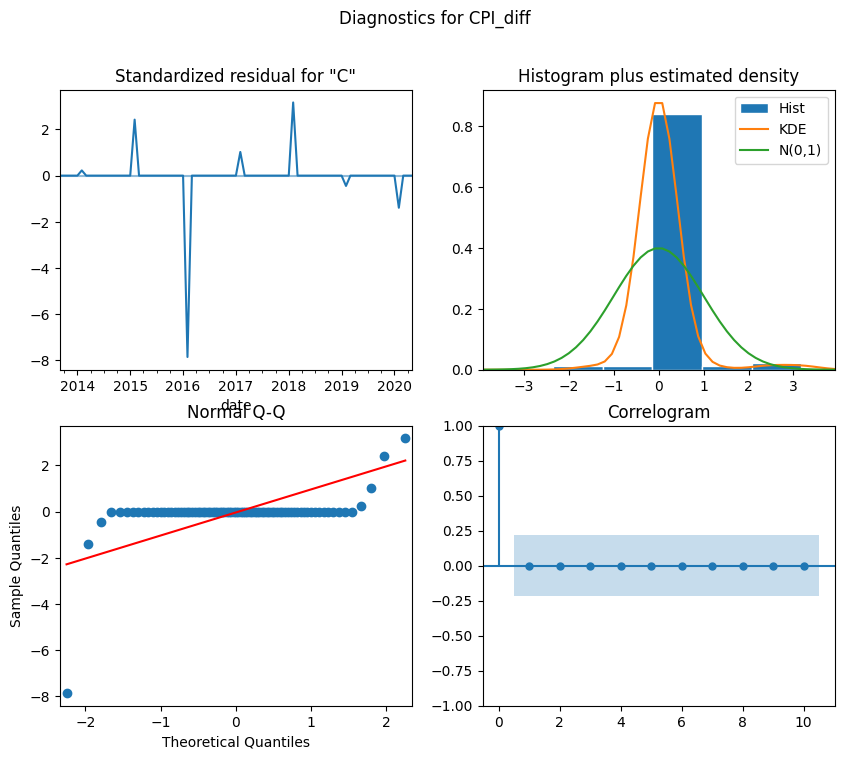

Fitting SARIMAX for Exchange Rate_diff...
Diagnostics for Exchange Rate_diff:


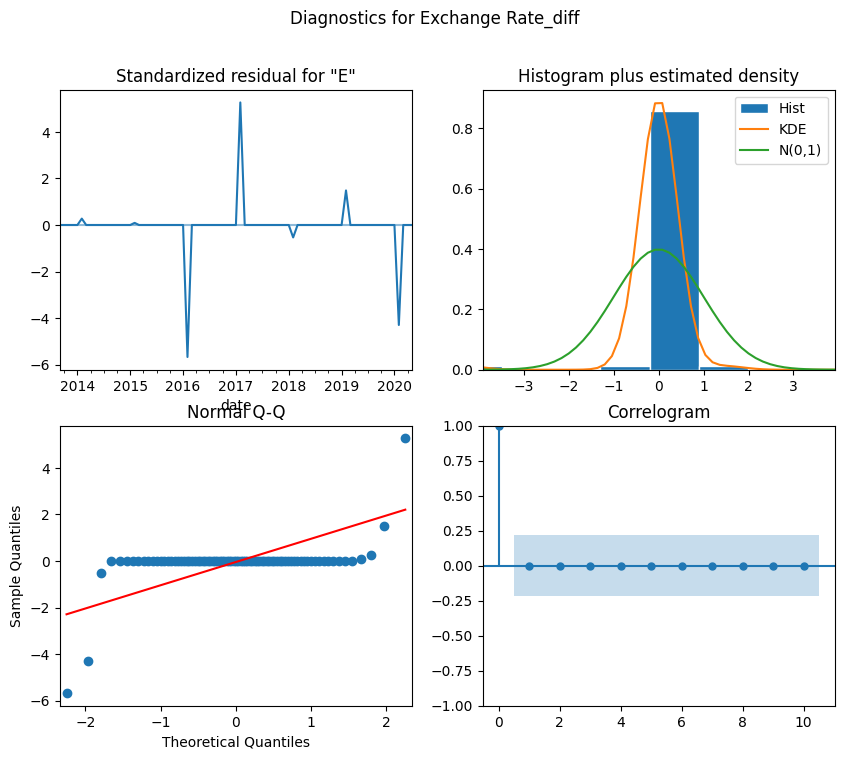

Fitting SARIMAX for GDP Deflator_diff...
Diagnostics for GDP Deflator_diff:


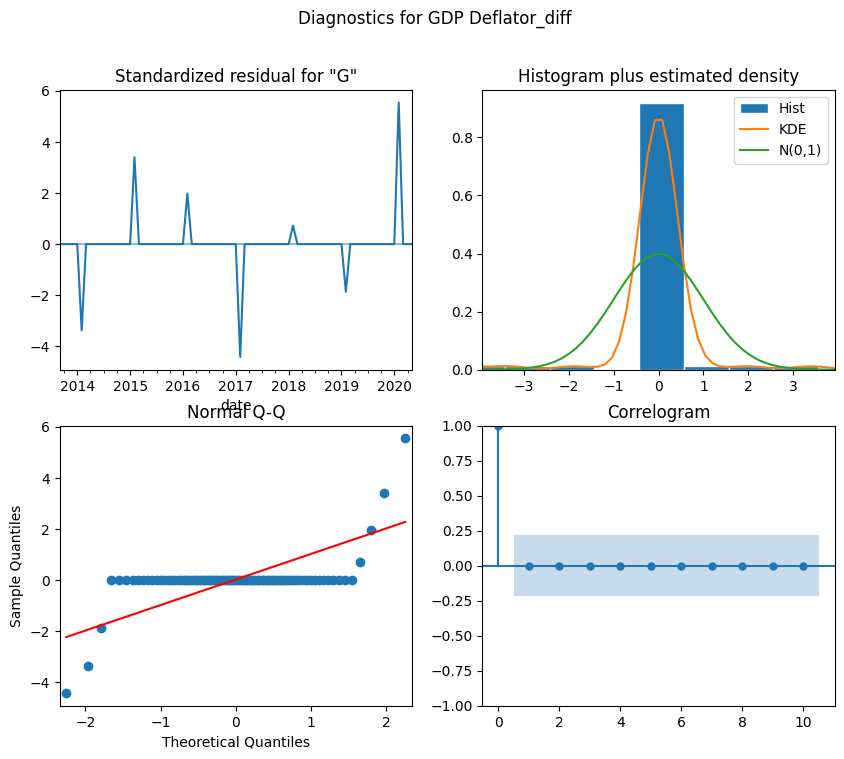

Fitting SARIMAX for GDP Growth_diff...
Diagnostics for GDP Growth_diff:


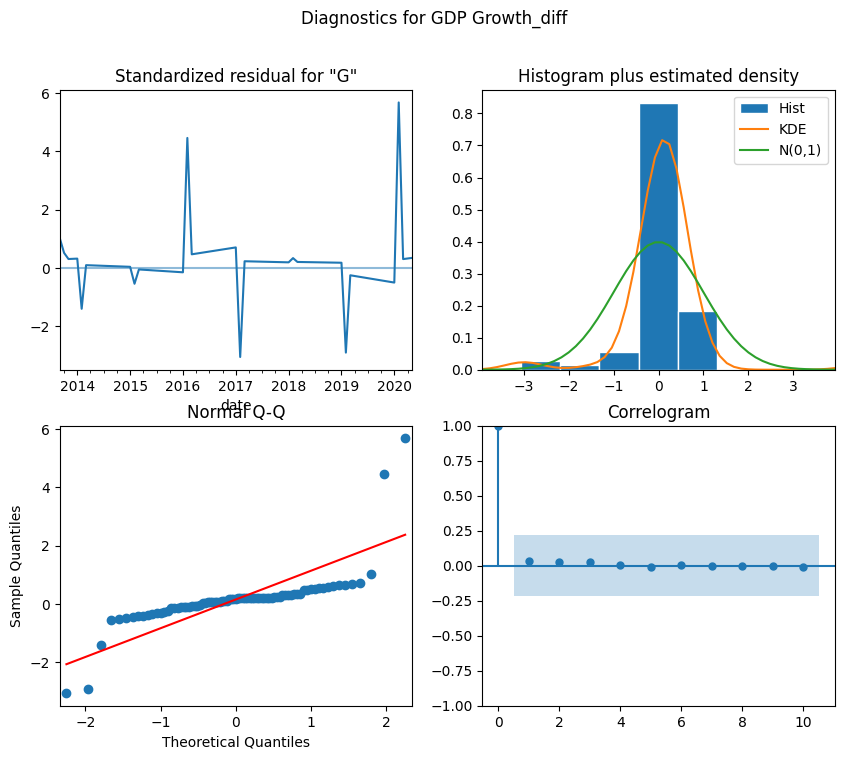

Fitting SARIMAX for Cereal Yield_diff...
Diagnostics for Cereal Yield_diff:


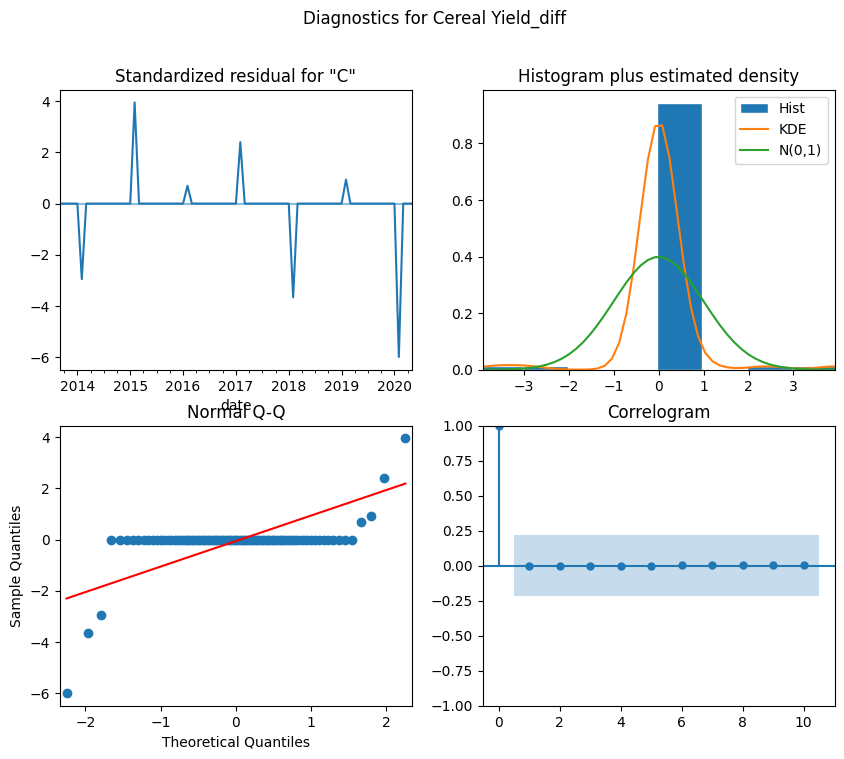

Fitting SARIMAX for Fertilizer Consumption_diff...
Diagnostics for Fertilizer Consumption_diff:


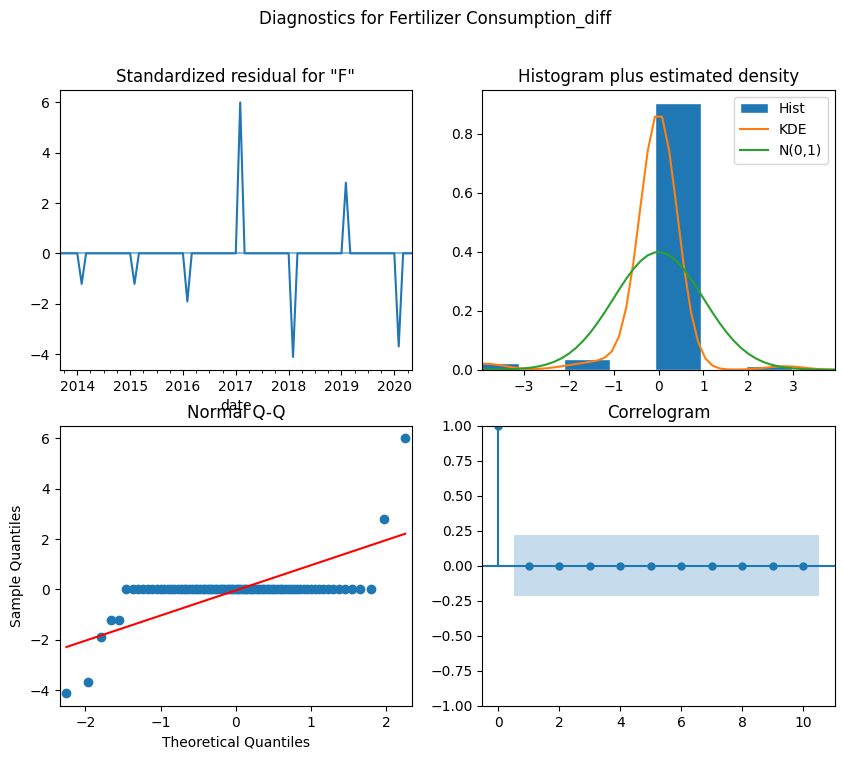

Fitting SARIMAX for Rural Population_diff...
Diagnostics for Rural Population_diff:


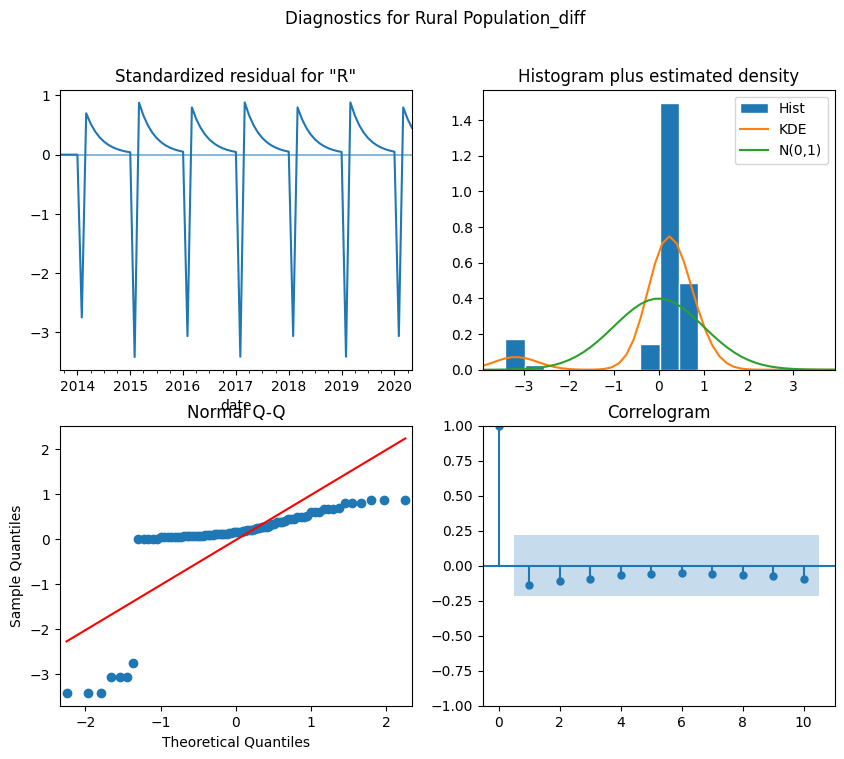

Fitting SARIMAX for Employment in Agriculture_diff...
Diagnostics for Employment in Agriculture_diff:


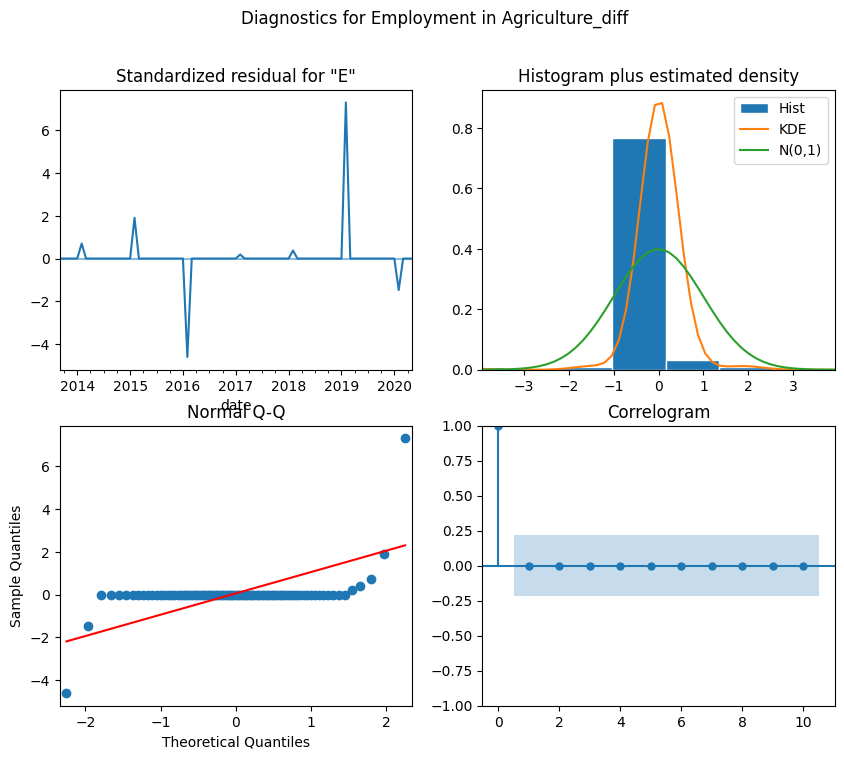

Fitting SARIMAX for Access to Electricity_diff...


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Diagnostics for Access to Electricity_diff:


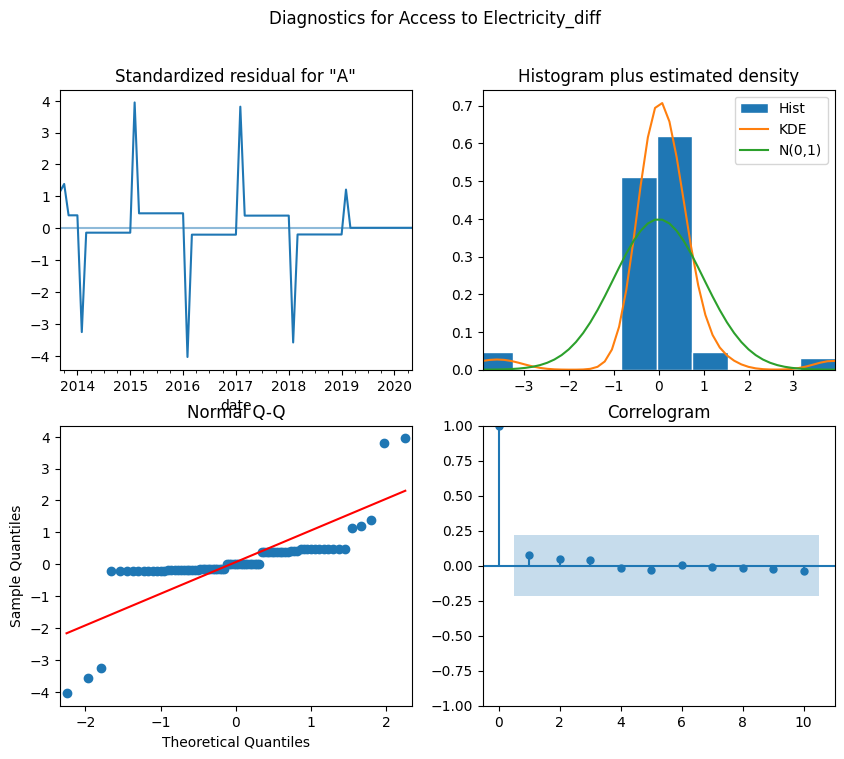

Fitting SARIMAX for Inflation Rate_diff...
Diagnostics for Inflation Rate_diff:


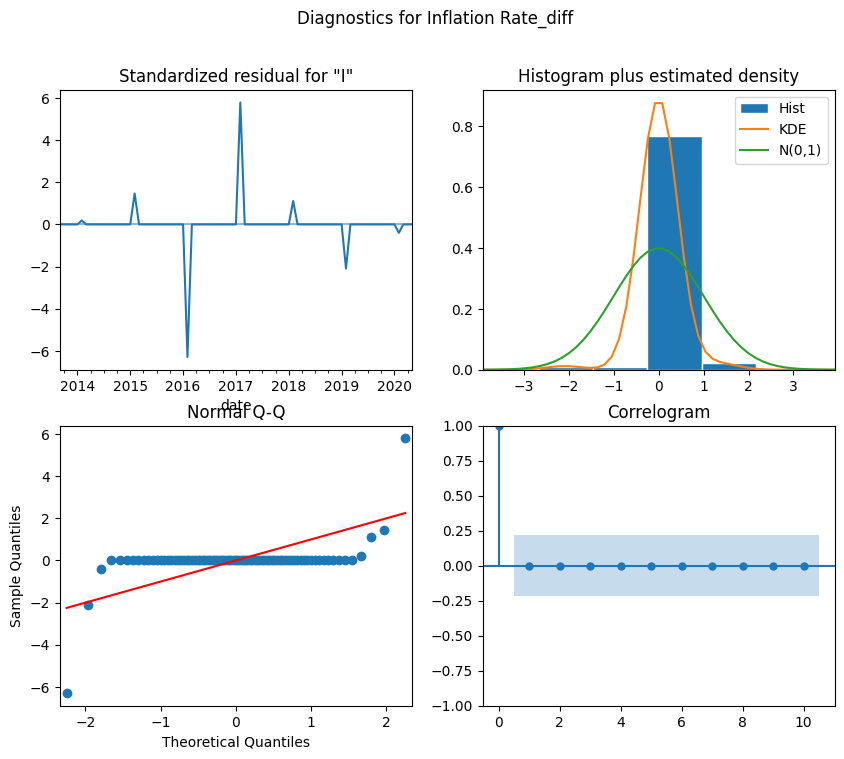

Fitting SARIMAX for temperature_2m_max_diff...
Diagnostics for temperature_2m_max_diff:


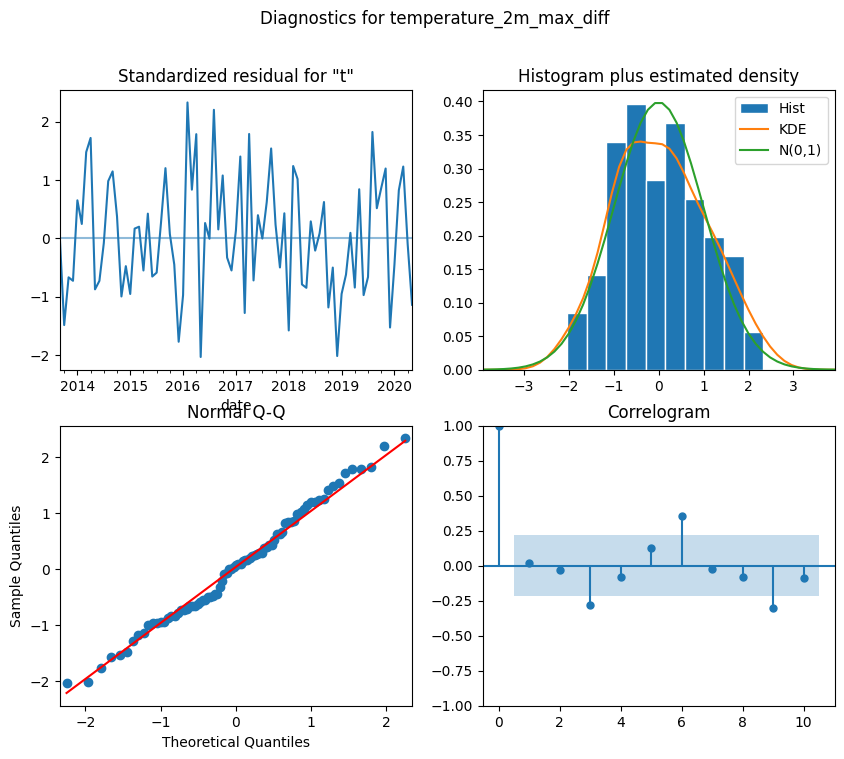

Fitting SARIMAX for temperature_2m_min_diff...


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Diagnostics for temperature_2m_min_diff:


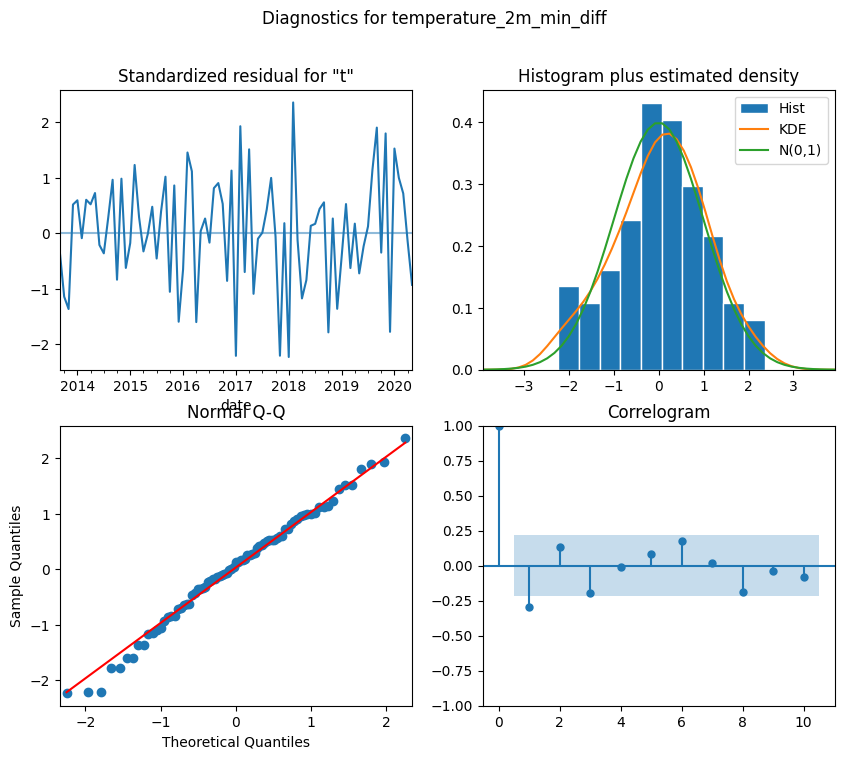

Fitting SARIMAX for temperature_2m_mean_diff...
Diagnostics for temperature_2m_mean_diff:


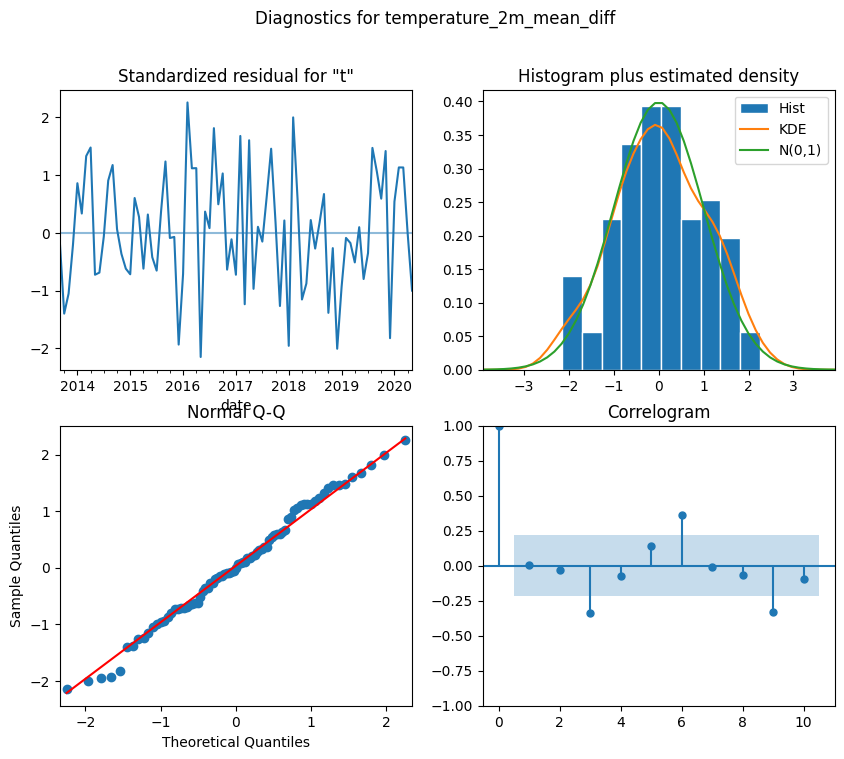

Fitting SARIMAX for precipitation_sum_diff...
Diagnostics for precipitation_sum_diff:


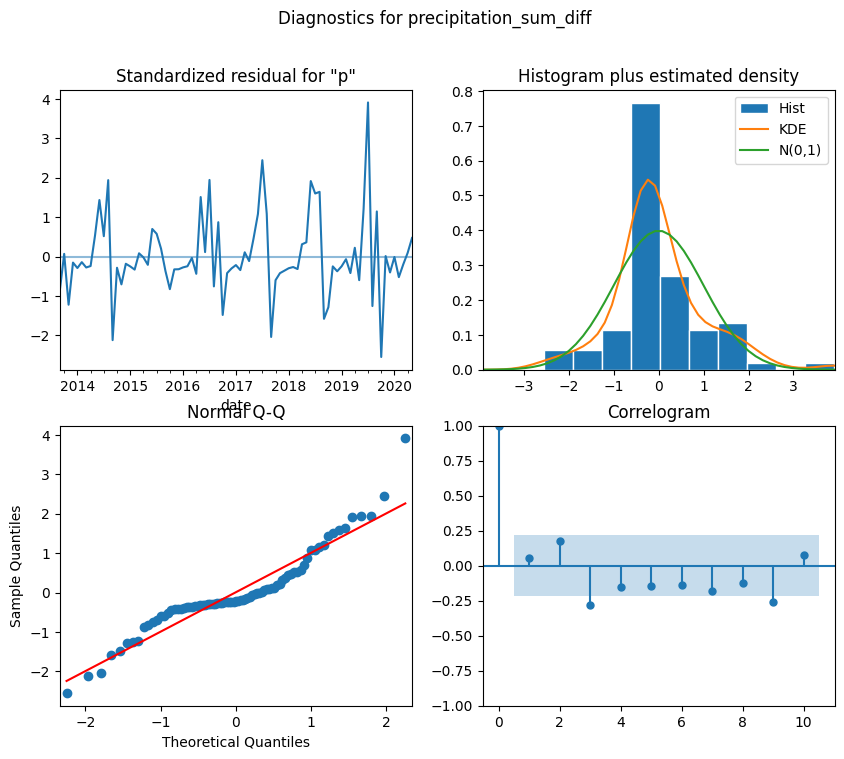

Fitting SARIMAX for wind_speed_10m_max_diff...
Diagnostics for wind_speed_10m_max_diff:


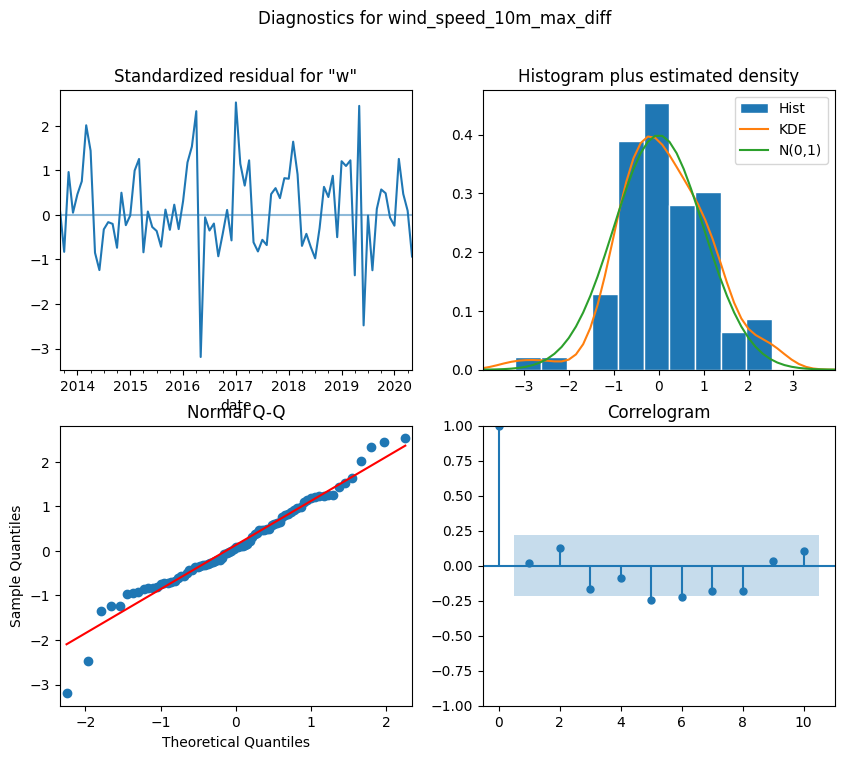

Fitting SARIMAX for shortwave_radiation_sum_diff...


c:\Users\lukas.stamm\Documents\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Diagnostics for shortwave_radiation_sum_diff:


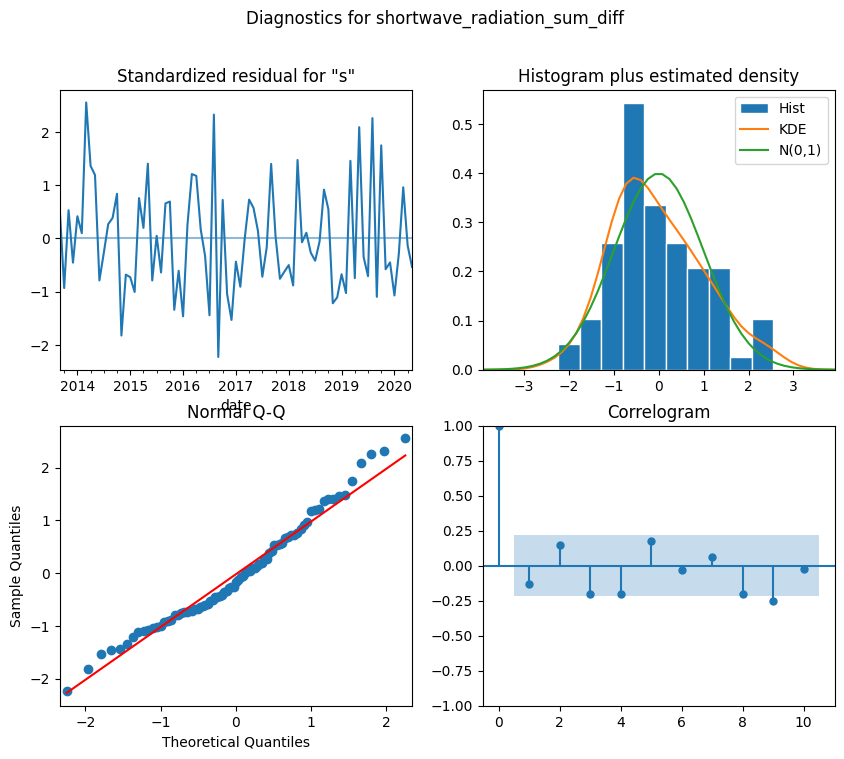

Fitting SARIMAX for et0_fao_evapotranspiration_diff...
Diagnostics for et0_fao_evapotranspiration_diff:


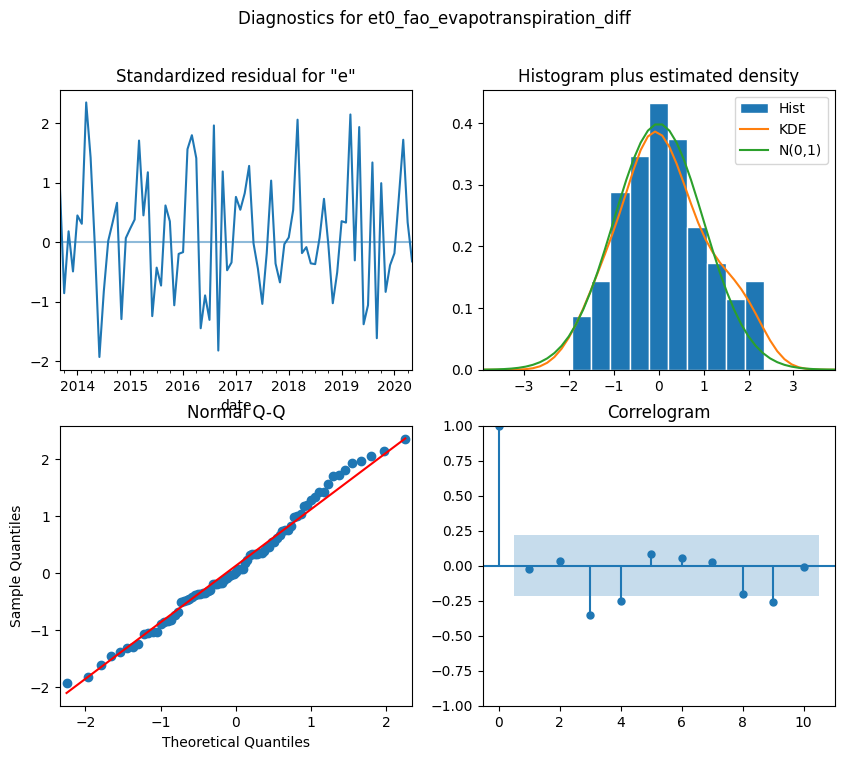

Fitting SARIMAX for Export Quantity_diff...
Diagnostics for Export Quantity_diff:


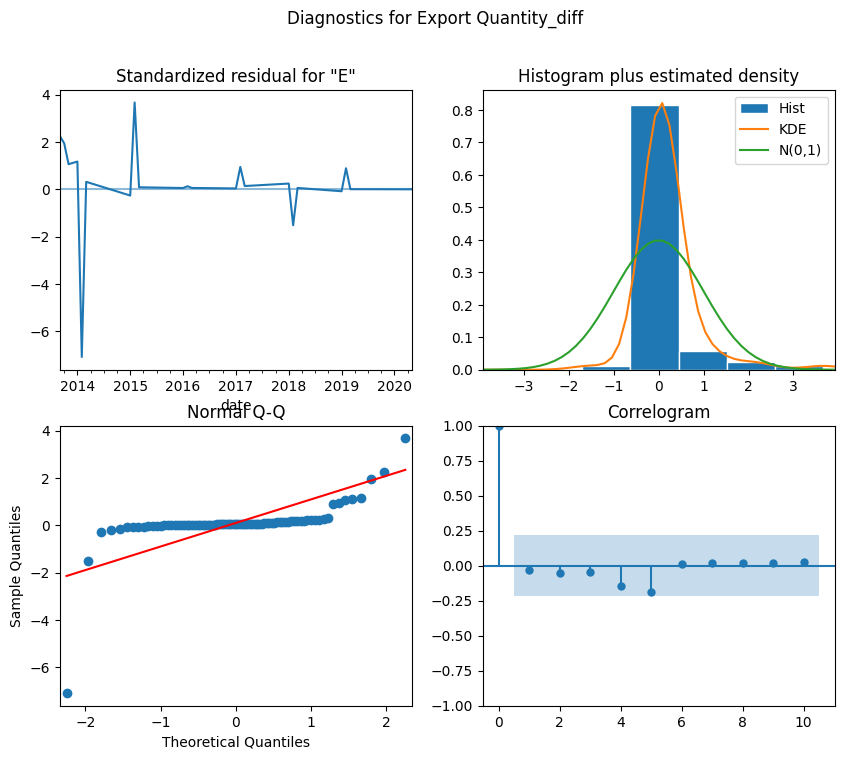

Fitting SARIMAX for Import Quantity_diff...
Diagnostics for Import Quantity_diff:


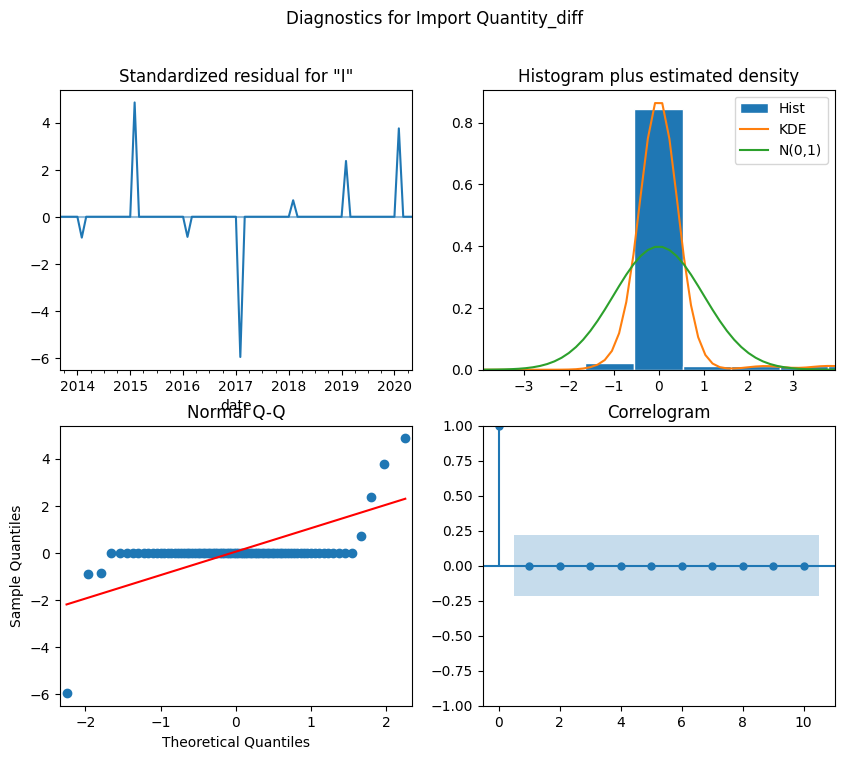

Fitting SARIMAX for Area harvested_diff...
Diagnostics for Area harvested_diff:


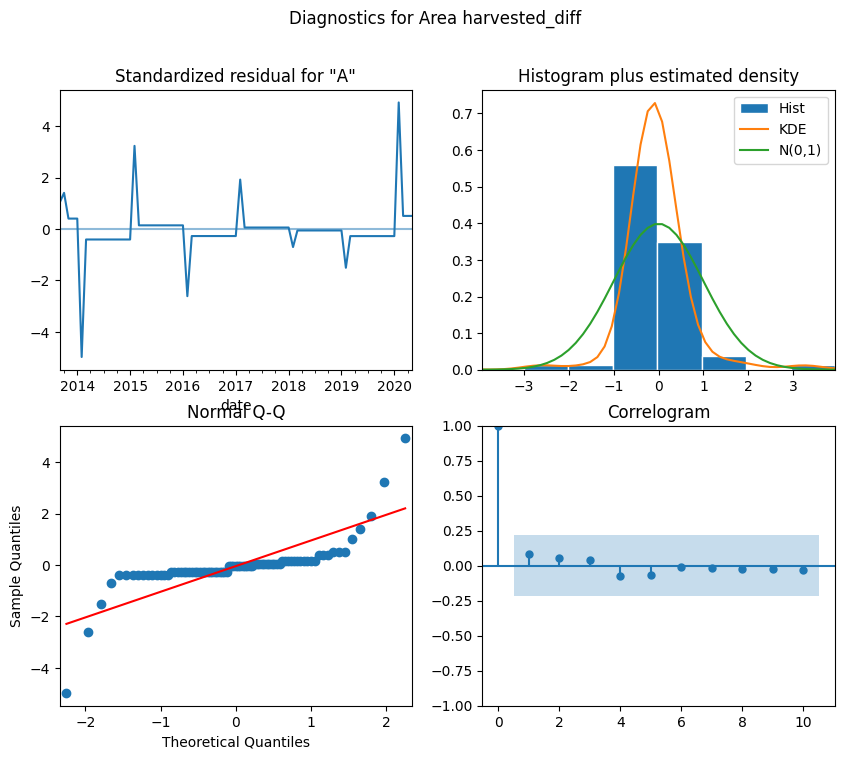

Fitting SARIMAX for Production_diff...
Diagnostics for Production_diff:


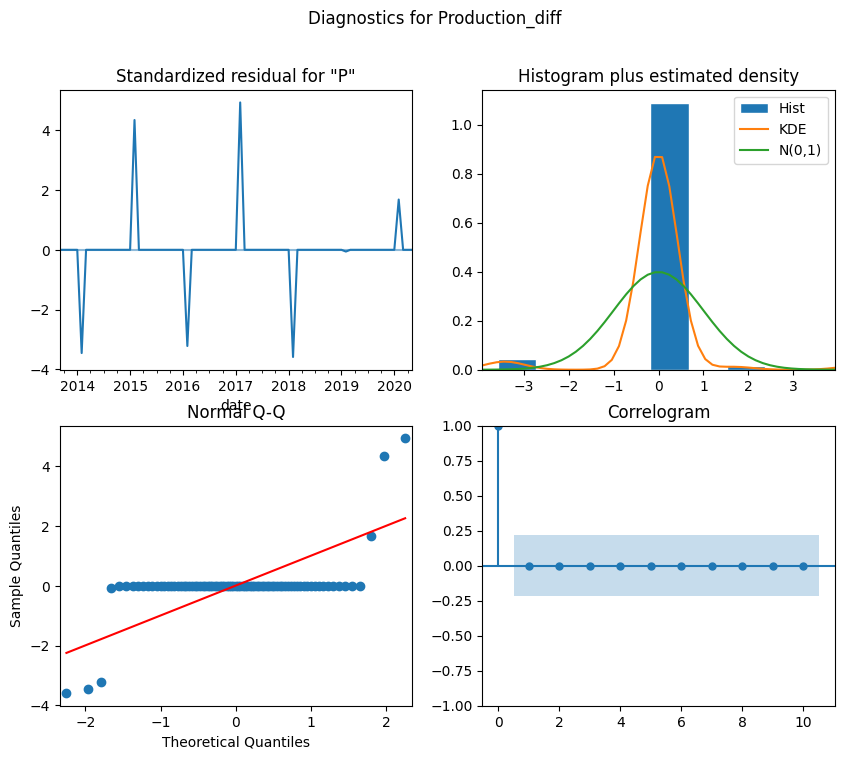

Fitting SARIMAX for Yield_diff...
Diagnostics for Yield_diff:


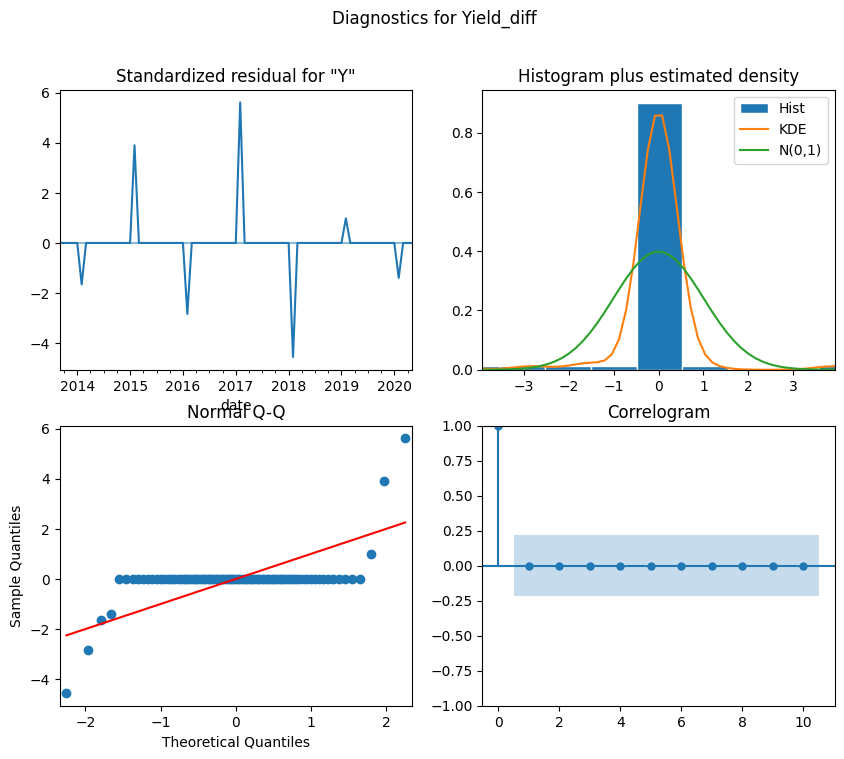

In [78]:
def fit_and_diagnose_sarimax_with_results(df, df_results, differencing_degrees):

    fitted_models = {}
    
    for col in df.columns:
        print(f"Fitting SARIMAX for {col}...")
        
        best_pq = df_results[col]['(p,q)'].iloc[0]  # First (p, q) from the sorted results
        p, q = best_pq
        d = differencing_degrees.get(col, 0)  # Get differencing degree
        
        try:
            # Fit SARIMAX model
            model = SARIMAX(df[col], order=(p, d, q), simple_differencing=False)
            model_fit = model.fit(disp=False)
            fitted_models[col] = model_fit
            
            # Plot diagnostics
            print(f"Diagnostics for {col}:")
            model_fit.plot_diagnostics(figsize=(10, 8))
            plt.suptitle(f"Diagnostics for {col}")
            plt.show()
        
        except Exception as e:
            print(f"Error fitting SARIMAX for {col}: {e}")
            fitted_models[col] = None
    
    return fitted_models


fitted_models = fit_and_diagnose_sarimax_with_results(train_data, df_results, differencing_degrees)

---